# Pos Cas Balance data cleaning

## Import libraries

In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
pcb = pd.read_csv('.././data/POS_CASH_balance.csv')

## Prelminiary data analysis

In [3]:
pd.set_option('display.max_columns', None)

display(pcb.sample(10))
print(f'POS CASH balance data contains:\n{pcb.shape[0]} rows and {pcb.shape[1]} columns')
print('\nPOS CASH balance data info:')
print(pcb.info())
print('\nStatistical Summary of numerical columns:')

numerical = pcb.select_dtypes(include='number')
display(numerical.describe())

categorical = pcb.select_dtypes(include='object')
display(categorical.describe())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9256989,1595032,185721,-59,24.0,7.0,Active,0,0
9832888,1112579,417964,-71,18.0,9.0,Active,0,0
5999439,1257330,126412,-7,24.0,21.0,Active,0,0
5289012,1565916,202281,-66,5.0,3.0,Active,0,0
1057726,2132581,127078,-4,18.0,16.0,Active,0,0
909521,2762150,256453,-29,12.0,4.0,Active,0,0
8853976,1745611,399710,-30,12.0,10.0,Active,0,0
9011326,2729712,218833,-9,12.0,5.0,Active,0,0
6103890,2836455,167046,-35,18.0,2.0,Active,0,0
6959386,1799853,253988,-86,12.0,12.0,Active,0,0


POS CASH balance data contains:
10001358 rows and 8 columns

POS CASH balance data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None

Statistical Summary of numerical columns:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


,NAME_CONTRACT_STATUS
count,10001358
unique,9
top,Active
freq,9151119


## Duplicate Values Checking

In [4]:
dup = pcb.duplicated().sum()
print(f'\nThere are {dup} duplicated rows in the data')


There are 0 duplicated rows in the data


## Missing values checking and handle

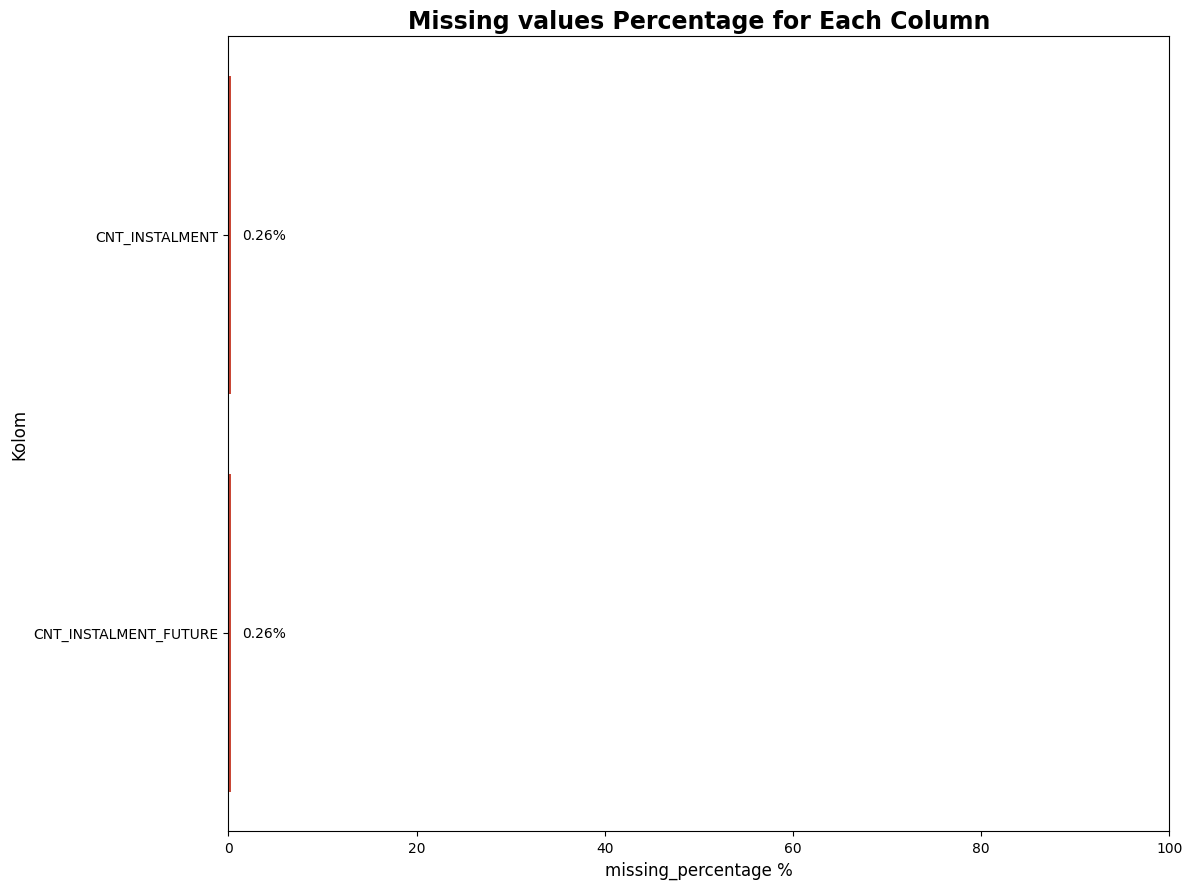

In [5]:
ms.plot_missing_percentage(pcb)

In [6]:
pcb.loc[pcb['CNT_INSTALMENT'].isna()].sample(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
6549005,2310674,448581,-27,NaN,NaN,Signed,0,0
5255089,2116298,406146,-22,NaN,NaN,Signed,0,0
3966542,1158391,186124,-32,NaN,NaN,Approved,0,0
7902276,2363928,243968,-16,NaN,NaN,Signed,0,0
5820443,2571189,282306,-32,NaN,6.0,Signed,0,0
8263650,2202895,380677,-13,NaN,NaN,Approved,0,0
9341738,2770135,250229,-31,NaN,NaN,Signed,0,0
7596899,1932718,100130,-2,NaN,NaN,Signed,0,0
3285283,2101275,330831,-22,NaN,NaN,Signed,0,0
8728178,1405948,305715,-2,NaN,NaN,Returned to the store,0,0


because the missing values seems reasonable from the pattern of the missing values and the missing values are just 0.2% of the total data, i decided to fill the missing values with 0.

In [28]:
pcb_clean = pcb.fillna(0)
pcb_clean.to_csv('.././data/POS_CASH_balance_clean.csv', index=False)